In [2]:
from __future__              import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
import numpy      as np
import time
import os
import pandas                 as pd
import matplotlib             as mpl
import matplotlib.pyplot      as plt


from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras        import Model

#plt config
mpl.style.use("default")
mpl.rcParams["axes.facecolor"] = "#EAEAF2" 

# Basics NN (notes) 

### SNN 

__`Definitions`__
* __layer__
  * core building block of neural networks
  * data-processing module that filters the data
  * extract _representations_ out of the data fed into them.
* __Dense__ layers 
  * densely connected neural layers also known as _fully connected_
* __loss function__
  * measure of performance on the training data
* __optimizer__
  * mechanism through which the NN will update itself based on the data it sees and the loss function
* __Metrics__ to monitor quality of training
  * accuracies, efficiency, purities, ... etc 

In [ ]:
"""
model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)), 
                          keras.layers.Dense(128, activation=tf.nn.relu),
                          keras.layers.Dense(10, activation=tf.nn.softmax)])
"""

__` Keras Code Explanation`__
* __keras.Sequential__ model is a linear stack of layers
* __tf.keras.layers.Flatten__ transforms the format of the images from a 2d-array (28x28 pixels) to a 1d-array
  (28*28=784pixels)
* __tf.keras.layers.Dense__ 
  * the network will consist of two dense (fully-connected) neural layers. 
    * 1st dense neural layer has 128 nodes 
      * activation function describes what kind of output one wants from the layer
      * tf.nn.relu = Re(ctified) L(inear) U(nit)
        * As results from each layer needs to yield a specific representation of result (i.e. 0 or 1), there
          for we need to 
          rectify the result using a function and in this case, a linear function.
    * 2nd dense neural layer has 10-node softmax layer - `This is where __prediction__ happens`
      * tf.nn.softmax = returns an array of 10 probability scores that sum to 1 - Normalisation of 
        sum(input)=1
        * each node contains a score that indicates the probability that the current image belong to one of 10 
          classes       

__`Framework of NN`__
* Each neural netwrork operates on input data as follow:
  $$ output = relu(dot(W, input) + b) $$
  * $b=trainable\ parameter$ are tensors that is attribute of the _bias_
      * Bias is like the intercept added in a linear equation
          * adjust the output along with the weighted sum of inputs
          * adjusted to help the model to fit best for the given data
  * $W=weights$ (_coefficients_) - tensor that is an attribute of the _kernel_ 
    * Initially, these weights are filled with small randome values, _random initialization_
    * gradual adjustment of these weights after each iteration in _training loop_ = training the model data
      1. Draw training samples _x_ and corresponding targets _y_
      2. Run the network on _x_ (step called _forward pass_) to obtain predictions _y_pred_
      3. Compute the loss of the network on the batch: a measure of the mismatch between _y_pred_ and _y_.
      4. __Optimizer__: Update all weights of the network in a way that slightly reduces the loss on this batch. 
        * How can you compute how the coefficient should be altered? improved?
          1. Naive solution
            * freeze all weights in the network except the one scalar coefficient being considered and try new values
              untill it improves. 
          2. Better solution (_stochastic gradient descent_ SGD algorithm)
            * Since all tensor operations are _differentiable_, compute _graduent_ of the loss function with regards 
              to the network's coefficients/parameters. Then, move the coefficients in the opposite direction from the
              gradient, thus decreasing the loss: 
              $$ W := W - (step\ *\ gradient) $$
            * Find the minimum and alter the coefficients toward minimum.
            * _stochastic_ refers to the fact that each batch of data is drawn at random.
          3. SGD with momentum
            * use gradient of not only the current value (current velocity), but also the past value (past velocity). Thus,
              it allows the see local minimum + global minimum.
            
* __Optimizer__ and __loss function__ are what determines the NN algorithm
    * Optimizer `AdamOptimizer()` - Adaptive moment estimation
      * See paper by Kingma
    * Loss function `sparse_categorical_crossentropy`
      * See Information Theory for definition of entropy

# Tensors and Operations 

#### Tensorflow Tensors 

A Tensor is a multi-dimensional array. Similar to NumPy `ndarray` objects, `tf.Tensor` objects have a data type and a shape. Additionally, `tf.Tensor`s can reside in accelerator memory (like a GPU). TensorFlow offers a rich library of operations ([tf.add](https://www.tensorflow.org/api_docs/python/tf/add), [tf.matmul](https://www.tensorflow.org/api_docs/python/tf/matmul), [tf.linalg.inv](https://www.tensorflow.org/api_docs/python/tf/linalg/inv) etc.) that consume and produce `tf.Tensor`s. These operations automatically convert native Python types, for example:

###### Creating Tensors 

In [ ]:
a = tf.convert_to_tensor(3.0)
b = tf.convert_to_tensor([1, 2])
c = tf.constant(3.0, dtype=tf.float32)
print(a)
print(b)
print(c)

In [ ]:
a = tf.ones([3, 2])
b = tf.zeros([3, 2])
print(a)
print(b)

###### Types of tensors 

* tf.constant
* tf.Variable 
    * After construction, the type and shape of the 
      variable are fixed. The value can be changed using one of the assign methods
* tf.placeholder 
    * a promise to provide a value later, like a fn argument
* tf.SparseTensor 

In [ ]:
#tf.constant
a = tf.constant(3.0, dtype=tf.float32)
print(a)

In [ ]:
#tf.Variable
v = tf.Variable(1.0)
print(v)

# Reassign the value `v`
v.assign(3.0)
print(v)

#Subtracts a value from this variable.
v.assign_sub(3.0)
print(v)


# Use `v` in a TensorFlow `tf.square()` operation and reassign
v.assign(tf.square(v))
print(v)

###### Basic tensor operations 

In [ ]:
print(tf.add(1, 2))
print(tf.add([1, 2], [3, 4]))
print(tf.square(5))
print(tf.reduce_sum([1, 2, 3]))

# Operator overloading is also supported
print(tf.square(2) + tf.square(3))

###### Access Tensor Components & Details 

In [7]:
#Tensor vector
a = tf.add([1, 2], [3, 4])
a

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([4, 6], dtype=int32)>

In [68]:
#Access tensor components via index
print(a[0])

#Access tensor components via iteration
print("#======================================")
for i in a:
    print(i)

tf.Tensor(4, shape=(), dtype=int32)
#======================================
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)


In [82]:
#Accress attributes of tensor
print(len(a))
print(a.shape)
print(a.dtype)

2
(2,)
<dtype: 'int32'>


Each `tf.Tensor` has a shape and a datatype:

In [ ]:
x = tf.matmul([[1]], [[2, 3]])
print(x)
print(x.shape)
print(x.dtype)

The most obvious differences between NumPy arrays and `tf.Tensor`s are:

1. Tensors can be backed by accelerator memory (like GPU, TPU).
2. Tensors are immutable.

#### NumPy Compatibility

Converting between a TensorFlow `tf.Tensor`s and a NumPy `ndarray` is easy:

* TensorFlow operations automatically convert NumPy ndarrays to Tensors.
* NumPy operations automatically convert Tensors to NumPy ndarrays.

Tensors are explicitly converted to NumPy ndarrays using their `.numpy()` method. These conversions are typically cheap since the array and `tf.Tensor` share the underlying memory representation, if possible. However, sharing the underlying representation isn't always possible since the `tf.Tensor` may be hosted in GPU memory while NumPy arrays are always backed by host memory, and the conversion involves a copy from GPU to host memory.

In [ ]:
ndarray = np.ones([3, 3])

print("TensorFlow operations convert numpy arrays to Tensors automatically")
tensor = tf.multiply(ndarray, 42)
print(tensor)

print("And NumPy operations convert Tensors to numpy arrays automatically")
print(np.add(tensor, 1))

print("The .numpy() method explicitly converts a Tensor to a numpy array")
print(tensor.numpy())

#### GPU acceleration

Many TensorFlow operations are accelerated using the GPU for computation. Without any annotations, TensorFlow automatically decides whether to use the GPU or CPU for an operation—copying the tensor between CPU and GPU memory, if necessary. Tensors produced by an operation are typically backed by the memory of the device on which the operation executed, for example:

In [ ]:
x = tf.random.uniform([3, 3])

print("Is there a GPU available: "),
print(tf.config.experimental.list_physical_devices("GPU"))

print("Is the Tensor on GPU #0:  "),
print(x.device.endswith('GPU:0'))

#### Device Names 

The `Tensor.device` property provides a fully qualified string name of the device hosting the contents of the tensor. This name encodes many details, such as an identifier of the network address of the host on which this program is executing and the device within that host. This is required for distributed execution of a TensorFlow program. The string ends with `GPU:<N>` if the tensor is placed on the `N`-th GPU on the host.

#### Explicit Device Placement: tf.device 

In TensorFlow, placement refers to how individual operations are assigned (placed on) a device for execution. As mentioned, when there is no explicit guidance provided, TensorFlow automatically decides which device to execute an operation and copies tensors to that device, if needed. However, TensorFlow operations can be explicitly placed on specific devices using the `tf.device` context manager, for example:

In [ ]:
def time_matmul(x):
    start = time.time()
    for loop in range(10):
        tf.matmul(x, x)

    result = time.time()-start

    print("10 loops: {:0.2f}ms".format(1000*result))

# Force execution on CPU
print("On CPU:")
with tf.device("CPU:0"):
    x = tf.random.uniform([1000, 1000])
    assert x.device.endswith("CPU:0")
    time_matmul(x)

# Force execution on GPU #0 if available
if tf.config.experimental.list_physical_devices("GPU"):
    print("On GPU:")
    with tf.device("GPU:0"): # Or GPU:1 for the 2nd GPU, GPU:2 for the 3rd etc.
        x = tf.random.uniform([1000, 1000])
        assert x.device.endswith("GPU:0")
        time_matmul(x)


#### Datasets 

###### Create a source Dataset 
This section uses the `tf.data.Dataset` API to build a pipeline for feeding data to your model. The `tf.data.Dataset` API is used to build performant, complex input pipelines from simple, re-usable pieces that will feed your model's training or evaluation loops.

Create a source dataset using one of the factory functions like `Dataset.from_tensors`, `Dataset.from_tensor_slices`, or using objects that read from files like `TextLineDataset` or `TFRecordDataset`. See the `TensorFlow Dataset guide` for more information.

In [11]:
ds_tensors = tf.data.Dataset.from_tensor_slices([1, 2, 3, 4, 5, 6])

# Create a CSV file
import tempfile

_, filename = tempfile.mkstemp()

with open(filename, 'w') as f:
    f.write("""Line 1
    Line 2
    Line 3
      """)

ds_file = tf.data.TextLineDataset(filename)

###### Apply transformations 

Use the transformations functions like `map`, `batch`, and `shuffle` to apply transformations to dataset records.

In [12]:
ds_tensors = ds_tensors.map(tf.square).shuffle(2).batch(2)

ds_file = ds_file.batch(2)

###### Iterate

`tf.data.Dataset` objects support iteration to loop over records:

In [ ]:
print('Elements of ds_tensors:')
for x in ds_tensors:
    print(x)

print('\nElements in ds_file:')
for x in ds_file:
    print(x)

# Customization 

### Custom Model + Layers (keras)

###### Pre-built layers 

* Most of the time when writing code for machine learning models you want to operate at a higher level of abstraction than individual operations and manipulation of individual variables.

* Many machine learning models are expressible as the composition and stacking of relatively simple layers, and TensorFlow provides both a set of many common layers as a well as easy ways for you to write your own application-specific layers either from scratch or as the composition of existing layers.

* TensorFlow includes the full Keras API in the tf.keras package, and the Keras layers are very useful when building your own models.

* Pre-existing layers can be seen in [the documentation](https://www.tensorflow.org/api_docs/python/tf/keras/layers)

In [71]:
#Pre-existing layers

# In the tf.keras.layers package, layers are objects. To construct a layer,
# simply construct the object. Most layers take as a first argument the number
# of output dimensions / channels.
layer = tf.keras.layers.Dense(100)

# The number of input dimensions is often unnecessary, as it can be inferred
# the first time the layer is used, but it can be provided if you want to
# specify it manually, which is useful in some complex models.
layer = tf.keras.layers.Dense(10, input_shape=(None, 5))

In [ ]:
#Calling a layer
#    -layer input tensor has to have column 5
#    -When tensor of size (10, 5), which same as 10 lists with columns of 5, is inputted to layer that takes 
#     input of column 5 and outputs 10 column, the outcome is 10 lists with 10 columns: 
#    -Input (10x5) X Layer (5x10)
layer(tf.zeros([10, 5]))

In [ ]:
#Insoect layer
#    -The layer has dimention (5x10) as declared above
print(layer.variables)
print("#=================================================================================")
print(layer.trainable_variables)
print("#=================================================================================")
print(layer.kernel)
print("#=================================================================================")
print(layer.bias)

###### Custom-built Layers 

* `__init__` , where you can do all input-independent initialization
* `build`, where you know the shapes of the input tensors and can do the rest of the initialization
* `call`, where you do the forward computation

In [7]:
class MyDenseLayer(tf.keras.layers.Layer):
    def __init__(self, num_outputs):
        #Inherits __init__ function of super class
        #    -argument "MyDenseLayer" in super() refers to the subclass
        #    -argument "self" in super() refers to a subclass's object
        super(MyDenseLayer, self).__init__()
        self.num_outputs = num_outputs
        
    #build (func from super class) is called when called once from `__call__`,
    #    -when we know the shapes of inputs and `dtype`
    def build(self, input_shape):
        self.kernel = self.add_variable("kernel", shape=[int(input_shape[-1]), self.num_outputs])
        
    #Call(func from super class) is called  in `__call__` after making sure `build()` has been called once. 
    #    -Should actually perform the logic of applying the layer to the input tensors
    #    -inputs = Input tensor
    #    -return = a tensor or list/tuple of tensors
    #    -if no routine is written, if does the routine written on superclass's call() function,
    #     which is just to return the input passed on the the function.
    #    -kernel is the actual weights...?
    def call(self, input):
        return tf.matmul(input, self.kernel)

In [8]:
#Creating an object called __init__()
#    -10 number of outputs
layer = MyDenseLayer(10)

In [9]:
#Calling layer called __call__, which calls "build()" the layer object inside details
#    -the object "_" defined below is just a tensor
#    -Before making '_' tensor by  __call__() (which calls build()), "layer" object is empty
_ = layer(tf.zeros([10, 5]))

In [11]:
#Inspect layer
print(layer.variables)
print("#=================================================================================")
print(layer.trainable_variables)
print("#=================================================================================")
print(layer.kernel)
print("#=================================================================================")
# print(layer.bias)

[<tf.Variable 'my_dense_layer_1/kernel:0' shape=(5, 10) dtype=float32, numpy=
array([[-0.5852412 ,  0.6098084 , -0.5718751 ,  0.52079135,  0.40893728,
        -0.32012942,  0.0802111 , -0.56880987,  0.06239492,  0.15014046],
       [-0.19450247, -0.08402997, -0.29584062,  0.6059447 , -0.00548619,
         0.17737627, -0.2834943 , -0.11874539, -0.24548414,  0.08201844],
       [ 0.6115461 ,  0.41331226,  0.15088445,  0.12661946, -0.55213135,
         0.4099663 ,  0.12544286,  0.23846292, -0.15586576,  0.04623997],
       [ 0.21874076, -0.07823437,  0.48416477,  0.4394228 ,  0.39311248,
         0.5579372 ,  0.1471203 , -0.03963506, -0.4261588 , -0.19645113],
       [ 0.36150265, -0.51866144, -0.0579831 ,  0.35884982, -0.47525755,
         0.3813712 ,  0.33277172, -0.03003281, -0.44874728, -0.37177214]],
      dtype=float32)>]
#=================================================================================
[<tf.Variable 'my_dense_layer_1/kernel:0' shape=(5, 10) dtype=float32, numpy=
ar

In [12]:
#Inspect Names of variables
print([var.name for var in layer.trainable_variables])

['my_dense_layer_1/kernel:0']


###### Build Model: composing layers 

* Composing different pre-defined layers:
    * For ex, each residual bloack in a resnet is a composition of convolutions, batch normalizations, and a shortcut, which can be nested inside other layers.

* Inherit from `keras.Model` the tools such as `Model.fit`, `Model.evaluate`, `Model.save`, and etc.
* `keras.Model` also tracks `internal layers` making it easier to inspect.

In [3]:
#Example of Residual neural network (skipping specific layers at training)
class ResnetIdentityBlock(tf.keras.Model):
    def __init__(self, kernel_size, filters):
        
        #tf.keras.Model inherits network.Network
        super(ResnetIdentityBlock, self).__init__(name="")
        filters1, filters2, filters3 = filters
        
        #2 dimensional convolution
        #    -filter = dimensionality of the output space: # of output filters in convolution
        #    -kernel_size = specifying the height and width of the 2D convolution window
        #Object's attribute is also an object: self.conv2a is a Conv2D object
        self.conv2a = tf.keras.layers.Conv2D(filters1, (1, 1))
        
        #Normalize and scale inputs or activation
        #    -Normalize the activations of the previous layer at each batch,
        #     i.e. applies a transformation that maintains the mean activation 
        #     close to 0 and the activation standard deviation close to 1.s
        self.bn2a   = tf.keras.layers.BatchNormalization()
        
        #Padding = put zeros on outer layer of the 2d convonlution window
        #    -"same" argument puts zeros so that height and wiegh are preserved
        self.conv2b = tf.keras.layers.Conv2D(filters2, kernel_size, padding="same")
        self.bn2b   = tf.keras.layers.BatchNormalization()
        
        #Third layer
        self.conv2c = tf.keras.layers.Conv2D(filters3, (1, 1))
        self.bn2c   = tf.keras.layers.BatchNormalization()

    #call() defined in network.Network which is a superclass of tf.keras.Model
    #    -calls the model on new inputs
    def call(self, input_tensor, training=False):
        
        #First layer (Conv2D object) to receive the input tensor
        x = self.conv2a(input_tensor)
        #From normalization.py, traing=False when performing inference by using accumulated 
        #statistics instead of mini-batch  statistics. 
        x = self.bn2a(x, training=training)
        #rectificed linear unit
        x = tf.nn.relu(x)
        
        #Second 2D convolutional layer
        x = self.conv2b(x)
        x = self.bn2b(x, training=training)
        x = tf.nn.relu(x)

        #Third layer
        x = self.conv2c(x)
        x = self.bn2c(x,training=training)
        
        #Add the changed part "x" to the initial unchanged input...?? why??
        x = x + input_tensor
        x = tf.nn.relu(x)
        
        return x        

In [44]:
#Create the block object
block = ResnetIdentityBlock(1, [1, 2, 3])
block

In [102]:
#Call block -> builds 
#    -Build the model first by calling `build()` or calling `fit()` with some data, or 
#    -specify an `input_shape` argument in the first layer(s) for automatic build
_ = block(tf.zeros([1, 2, 3, 3]))

###### Insepcting Model + Layers 

In [107]:
block.summary()

Model: "resnet_identity_block_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           multiple                  4         
_________________________________________________________________
batch_normalization_27 (Batc multiple                  4         
_________________________________________________________________
conv2d_28 (Conv2D)           multiple                  4         
_________________________________________________________________
batch_normalization_28 (Batc multiple                  8         
_________________________________________________________________
conv2d_29 (Conv2D)           multiple                  9         
_________________________________________________________________
batch_normalization_29 (Batc multiple                  12        
Total params: 41
Trainable params: 29
Non-trainable params: 12
______________________________________________

In [112]:
block.layers

In [130]:
#First layer (Conv2D)'s details
print("#=======================================================================================")
print("KERNEL")
print(block.layers[0].kernel)
print("#=======================================================================================")
print("BIAS")
print(block.layers[0].bias)
print("#=======================================================================================")
print("VARIABLES")
print(block.layers[0].variables)
print("#=======================================================================================")
print("TRAINABLE VARIABLES")
print(block.layers[0].trainable_variables)
print("#=======================================================================================")

#=======================================================================================
KERNEL
<tf.Variable 'resnet_identity_block_8/conv2d_27/kernel:0' shape=(1, 1, 3, 1) dtype=float32, numpy=
array([[[[ 1.1621989 ],
         [ 0.43201625],
         [-0.48580772]]]], dtype=float32)>
#=======================================================================================
BIAS
<tf.Variable 'resnet_identity_block_8/conv2d_27/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>
#=======================================================================================
VARIABLES
[<tf.Variable 'resnet_identity_block_8/conv2d_27/kernel:0' shape=(1, 1, 3, 1) dtype=float32, numpy=
array([[[[ 1.1621989 ],
         [ 0.43201625],
         [-0.48580772]]]], dtype=float32)>, <tf.Variable 'resnet_identity_block_8/conv2d_27/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]
#=======================================================================================
TRAINAB

In [ ]:
print(len(block.variables))
print(len(block.trainable_variables))

###### Build Model: keras.Sequential (SHORTCUT) 

In [ ]:
my_seq = tf.keras.Sequential([tf.keras.layers.Conv2D(1, (1, 1),
                                                    input_shape=(
                                                        None, None, 3)),
                             tf.keras.layers.BatchNormalization(),
                             tf.keras.layers.Conv2D(2, 1,
                                                    padding='same'),
                             tf.keras.layers.BatchNormalization(),
                             tf.keras.layers.Conv2D(3, (1, 1)),
                             tf.keras.layers.BatchNormalization()])
my_seq(tf.zeros([1, 2, 3, 3]))

In [ ]:
my_seq.summary()

### Automatic differentiation: tf.GradientTape (Optimizer Part)

* `tf.GradientTape` API is built for automatic differentiation, computing the gradient of a computation with respect to its input variables.
    * Tensorflow records all operations executed inside the context of a `tf.GradientTape` onto a "tape. 
    * Tensorflow then uses that "tape" and the gradients associated with each recorded operation to compute the gradients of a "recorded" computation using `reverse mode differentiation`.

###### tf.GradientTape() 

In [40]:
#GradientTape() Ex:
x = tf.ones([2, 2])

with tf.GradientTape() as t:
    #Watch operations done on tensor x
    t.watch(x)
    
    y = tf.reduce_sum(x)
    z = tf.multiply(y, y)
    
#Derivative of z wrt x
dz_dx = t.gradient(z, x)
for i in [0, 1]:
    for j in [0, 1]:
        #Make sure dz/dx matrice's element are all 8.0
        assert dz_dx[i][j].numpy() == 8.0
    

In [ ]:
x = tf.constant(3.0)

#persistent=True lets you compute gradient more than once
with tf.GradientTape(persistent=True) as t:
    t.watch(x)
    y = x * x
    z = y * y

dz_dx = t.gradient(z, x)  # 108.0 (4*x^3 at x = 3)
dy_dx = t.gradient(y, x)  # 6.0

print(dz_dx)
print(dy_dx)


#Drop the reference to the tape
# del t

###### Recording Contol Flow 

* Because tapes record operations as they are executed, Python control flow (using ifs and whiles for example) is naturally handled:

In [99]:
def f(x, y):
    output = 1.0
    for i in range(y):
        if i > 1 and i < 5:
            output = tf.multiply(output, x)
    return output

def grad(x, y):
    with tf.GradientTape() as t:
        t.watch(x)
        out = f(x, y)
    return t.gradient(out, x)

x = tf.convert_to_tensor(2.0)

assert grad(x, 6).numpy() == 12.0
assert grad(x, 5).numpy() == 12.0
assert grad(x, 4).numpy() == 4.0

###### Higer-order gradients

* Operations inside of the GradientTape context manager are recorded for automatic differentiation. 
* If gradients are computed in that context, then the gradient computation is recorded as well. 
* As a result, the exact same API works for higher-order gradients as well. For example:

In [62]:
x = tf.constant(1.0)
# x = tf.Variable(1.0)

with tf.GradientTape() as t:
    t.watch(x)
    
    with tf.GradientTape() as t2:
        t2.watch(x)
        y = x * x * x
    # Compute the gradient inside the 't' context manager
    # which means the gradient computation is differentiable as well.
    dy_dx = t2.gradient(y, x)
d2y_dx2 = t.gradient(dy_dx, x)

print(dy_dx.numpy())
print(d2y_dx2.numpy())

print(t2.watched_variables())
print(t.watched_variables())

tf.Tensor(1.0, shape=(), dtype=float32) haha
3.0
6.0
()
()


### Custom training: Regression (LLapi)

* Let's use the concepts you have learned so far—Tensor, Variable, and GradientTape—to build and train a simple model. This typically involves a few steps:
    * Define the model
    * Define a loss function
    * Obtain training data
    * Run through the training data and use "optimizer" to adjust
    
* Here, you'll create a simple linear model, f(x) = x * W + b, which has two variables: W (weights) and b (bias). You'll synthesize data such that a well trained model would have W = 3.0 and b = 2.0.

###### Data 

In [88]:
TRUE_W       = 3.0
TRUE_b       = 2.0
NUM_EXAMPLES = 1000

inputs  = tf.random.normal(shape=[NUM_EXAMPLES])
noise   = tf.random.normal(shape=[NUM_EXAMPLES])
outputs = inputs * TRUE_W + TRUE_b + noise 

###### Define the model 

In [89]:
class MyModel(object):
    def __init__(self):
        self.W = tf.Variable(5.0)
        self.b = tf.Variable(0.0)
        
    def __call__(self, x):
        return self.W * x + self.b

In [75]:
#Create model
model = MyModel()

#Call model
model(3.0).numpy()

15.0

###### Define a Loss function 

In [90]:
def loss(predicted_y, target_y):
    least_square_error = tf.square(predicted_y - target_y)
    return tf.reduce_mean(least_square_error)

###### Define a training loop 

With the network and training data, train the model using gradient descent to update the weights variable (W) and the bias variable (b) to reduce the loss. 
* There are many variants of the gradient descent scheme that are captured in tf.train.Optimizer—our recommended implementation.
* But in the spirit of building from first principles, here you will implement the basic math yourself with the help of `tf.GradientTape` for automatic differentiation and `tf.assign_sub` for decrementing a value (which combines tf.assign and tf.sub):

In [91]:
def train(model, inputs, true_val, learning_rate):
    with tf.GradientTape() as t:
        #watch inputs and true_val
        t.watch([model.W, model.b])
        
        #compute loss
        current_loss = loss(model(inputs), true_val)
        
        
    #Take gradient of "current_loss" WRT the input W and b
    dL_dW, dL_db = t.gradient(current_loss, [model.W, model.b])
    
    #W := W - (step * gradient_W) and b := b - (step * gradient_b)
    model.W.assign_sub(learning_rate * dL_dW)
    model.b.assign_sub(learning_rate * dL_db)    

In [92]:
#Store W and b for inspection
Ws, bs = [], []

#Train the model n times (epochs)
epochs_num = 10

#Create Model
model = MyModel()

for epoch in range(epochs_num):
    #Store W and b for inspection
    Ws.append(model.W.numpy())
    bs.append(model.b.numpy())
    
    #Compute loss at each epochs
    current_loss = loss(model(inputs), outputs)
    
    #Train at each epochs
    train(model, inputs, outputs, learning_rate=0.1)
    
    #Print status
    print("Epoch = {:2d} \t W = {:2.2f} \t b = {:2.2f} \t loss = {:2.5f}".format(epoch, Ws[-1], \
                                                                                 bs[-1], \
                                                                                 current_loss))

Epoch =  0 	 W = 5.00 	 b = 0.00 	 loss = 9.20415
Epoch =  1 	 W = 4.56 	 b = 0.39 	 loss = 6.13901
Epoch =  2 	 W = 4.22 	 b = 0.70 	 loss = 4.21437
Epoch =  3 	 W = 3.95 	 b = 0.95 	 loss = 3.00528
Epoch =  4 	 W = 3.74 	 b = 1.15 	 loss = 2.24533
Epoch =  5 	 W = 3.58 	 b = 1.31 	 loss = 1.76746
Epoch =  6 	 W = 3.45 	 b = 1.44 	 loss = 1.46681
Epoch =  7 	 W = 3.34 	 b = 1.55 	 loss = 1.27758
Epoch =  8 	 W = 3.26 	 b = 1.63 	 loss = 1.15841
Epoch =  9 	 W = 3.20 	 b = 1.70 	 loss = 1.08333


/home/chan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]
/home/chan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


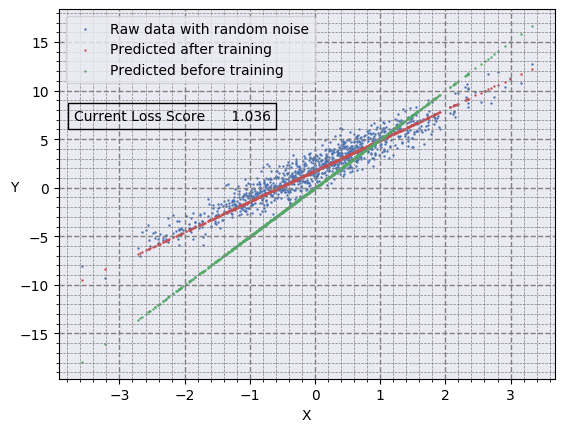

In [109]:
#Plot Raw Data + Prediction
raw_data = plt.figure()

#Create model for before training
model_before_train = MyModel()

plt.scatter(inputs, outputs, color="#4C72B0", s=0.5, label="Raw data with random noise")
plt.scatter(inputs, model(inputs), color='#C44E52', s=0.5, label="Predicted after training")
plt.scatter(inputs, model_before_train(inputs), color='#55A868', s=0.5, label="Predicted before training")


#Grids
plt.axes().xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(5))
plt.axes().yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(5))
plt.grid(b=True, which="major", color="gray", linewidth=1.0, linestyle="--")
plt.grid(b=True, which="minor", color="gray", linewidth=0.5, linestyle="--")

#Legends, axis labels
plt.legend()
plt.xlabel("X")
plt.ylabel("Y", rotation=0)

#Texts
plt.text(0.03, 0.7, "Current Loss Score {:>10.3f}" \
         .format(loss(model(inputs), outputs).numpy()), \
         fontsize=10, bbox=dict(facecolor='none', pad=4.0), transform=plt.gca().transAxes)

plt.show()
# raw_data.savefig("./rawdata")

/home/chan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/home/chan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


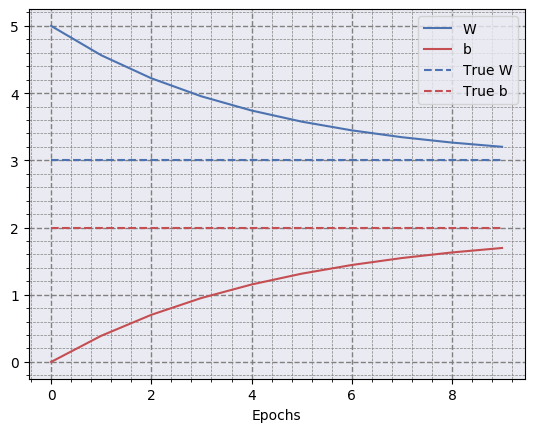

In [110]:
#Plot efficiency of training
plt.plot(range(epochs_num), Ws, '#4C72B0')
plt.plot(range(epochs_num), bs, '#C44E52')
plt.plot([TRUE_W] * epochs_num, '#4C72B0', ls="--")
plt.plot([TRUE_b] * epochs_num, '#C44E52', ls="--")

#Grids
plt.axes().xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(5))
plt.axes().yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(5))
plt.grid(b=True, which="major", color="gray", linewidth=1.0, linestyle="--")
plt.grid(b=True, which="minor", color="gray", linewidth=0.5, linestyle="--")

#legend, label
plt.legend(['W', 'b', 'True W', 'True b'])
plt.xlabel("Epochs")

plt.show()

### Custom training: walkthrough (keras)

# AymericDamien Examples 

## SNN with keras 

## SNN with LLapi 

## CNN with keras

## CNN with LLapi 

## Save & Restore 

## Custom Layers 